In [2]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install textblob

In [5]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

df = pd.read_csv('Elon_musk (1).csv')
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [7]:
# Create a function to clean the tweets
def cleanTxt(Text):
 Text = re.sub('@[A-Za-z0–9]+', '', Text) #Removing @mentions
 Text = re.sub('#', '', Text) # Removing '#' hash tag
 Text = re.sub('RT[\s]+', '', Text) # Removing RT
 Text = re.sub('https?:\/\/\S+', '', Text) # Removing hyperlink
 
 return Text


# Clean the tweets
df['Text'] = df['Text'].apply(cleanTxt)

# Show the cleaned tweets
df.head()

,Unnamed: 0,Text
0,1,11 I�m an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,27 Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [8]:
# Create a function to get the subjectivity
def getSubjectivity(Text):
   return TextBlob(Text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(Text):
   return  TextBlob(Text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Text'].apply(getSubjectivity)
df['Polarity'] = df['Text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Unnamed: 0,Text,Subjectivity,Polarity
0,1,11 I�m an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,27 Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


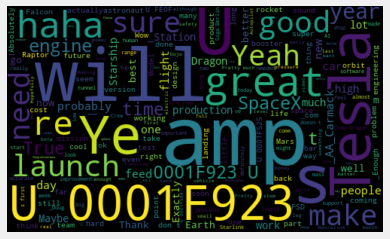

In [9]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Unnamed: 0,Text,Subjectivity,Polarity,Analysis
0,1,11 I�m an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,27 Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [11]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Text'][i])
    print()
    j= j+1

Printing positive tweets:

1)   Great interview!

2)  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!

3) Happy New Year of the Ox! 

4) _  10 Haha thanks :)

5) The most entertaining outcome is the most likely

6)   It�s getting real

7)  He definitely has issues, but the sentencing seems a bit high

8)  Thanks for fixing

9) This is true power haha 

10) : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! 

11) 3  _ Once we can predict cash flow reasonably well, Starlink will IPO

12)  888 Does seem a bit high

13)   Wow

14) _7_42  So cute <U+0001F495>

15)  Extremely misleading image, as doesn�t reflect true time cost to people or rain &amp; pain

16)  It�s the most fun crypto!

17)  True

18)   Not that easy. This is two decades of intense work. Have to look at old notes, emails, texts.

19)  Have you read ? It�s great!!

20) _ Sure

21) The great thing about restaurants is 

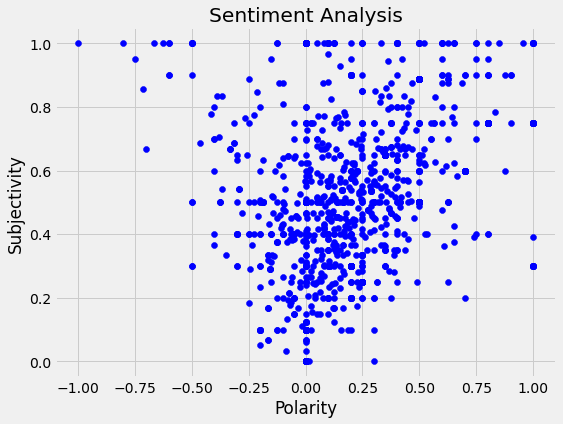

In [12]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [13]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Text']
ptweets
round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

44.3

In [14]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Text']
ntweets
round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

10.8

In [15]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     899
Positive    885
Negative    215
Name: Analysis, dtype: int64

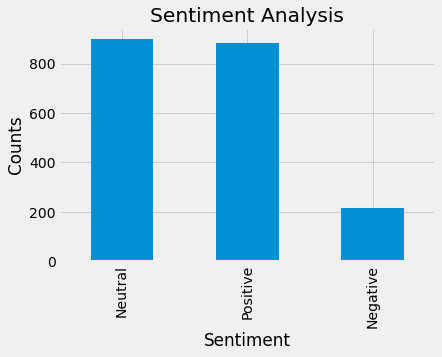

In [16]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()